In [1]:
import pandas as pd
from gapminder import *
from plotnine import *
from plotnine.animation import PlotnineAnimation

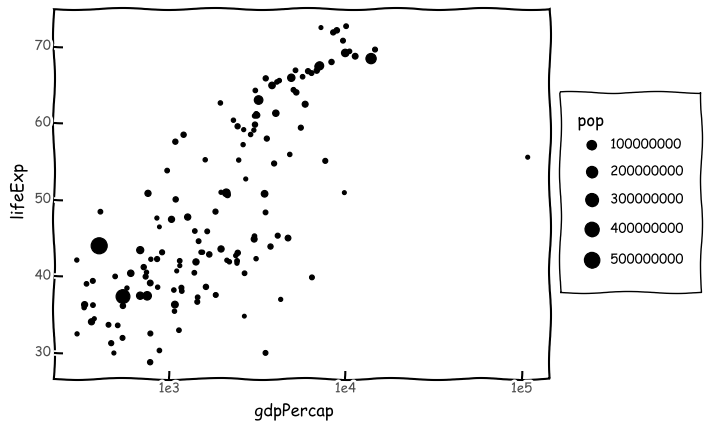

<ggplot: (138141104848)>

In [2]:
theme_set(theme_xkcd())

ggplot(gapminder[(gapminder.year == 1952)], aes(x='gdpPercap', y='lifeExp', size='pop')) + geom_point() + scale_x_log10()

## Q1. Why does it make sense to have a log10 scale on x axis? Q2. What country is the richest in 1952 (far right on x axis)?

### A1.

Re-plotting the gdp for 1952 without the logarithmic scale, we can see, that the outlier is so far ahead of the rest of the countries, that we have to squish the rest of the countries to allow for a linear x-axis that shows all countries.

This is not desirable, since it gets really hard to tell the countries apart and it insinuates, that the countries are very similar in gdp.

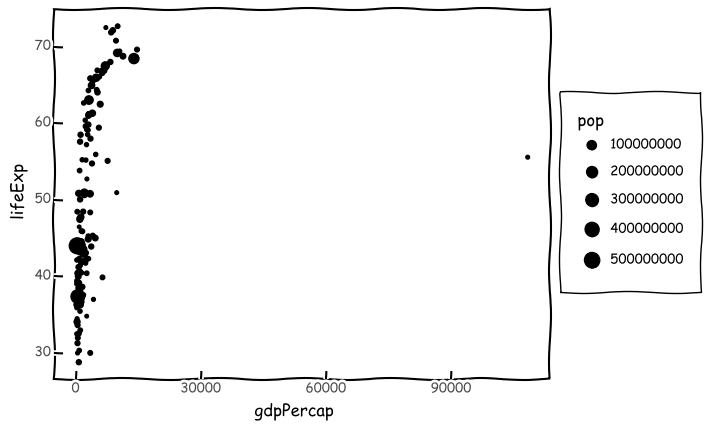

<ggplot: (138141100939)>

In [3]:
ggplot(gapminder[(gapminder.year == 1952)], aes(x='gdpPercap', y='lifeExp', size='pop')) + geom_point()

### A2.
If we look at all the records for 1952 and sort the records by the gdp per capita with the highest numbers at the top, we can see that Kuwait was booming in the 1950's.

In [4]:
gapminder[(gapminder.year == 1952)].sort_values(by = "gdpPercap", ascending = False)

,country,continent,year,lifeExp,pop,gdpPercap
852,Kuwait,Asia,1952,55.565,160000,108382.352900
1476,Switzerland,Europe,1952,69.620,4815000,14734.232750
1608,United States,Americas,1952,68.440,157553000,13990.482080
240,Canada,Americas,1952,68.750,14785584,11367.161120
1092,New Zealand,Oceania,1952,69.390,1994794,10556.575660
...,...,...,...,...,...,...
204,Burundi,Africa,1952,39.031,2445618,339.296459
1044,Myanmar,Asia,1952,36.319,20092996,331.000000
492,Eritrea,Africa,1952,35.928,1438760,328.940557
624,Guinea-Bissau,Africa,1952,32.500,580653,299.850319


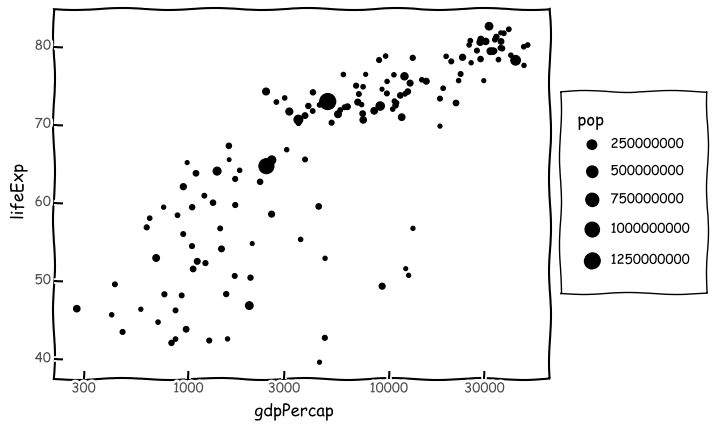

<ggplot: (138141661889)>

In [5]:
ggplot(gapminder[(gapminder.year == 2007)], aes(x='gdpPercap', y='lifeExp', size='pop')) + geom_point() + scale_x_log10()

## Q3. Can you differentiate the continents by color and fix the axis labels? Q4. What are the five richest countries in the world in 2007?

### A3.
Sure thing:

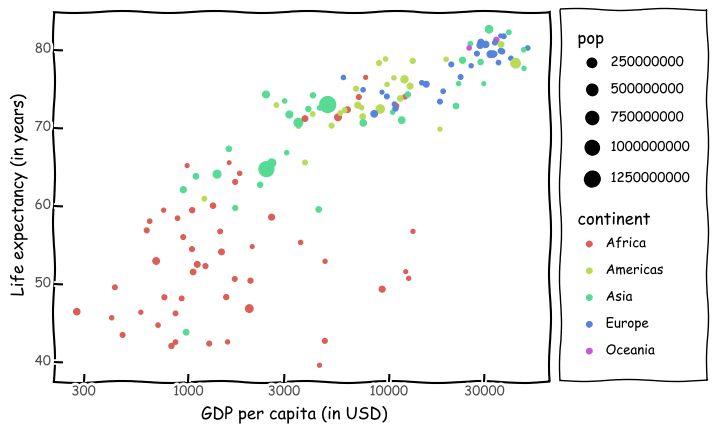

<ggplot: (138141738391)>

In [6]:
ggplot(gapminder[(gapminder.year == 2007)], aes(x='gdpPercap', y='lifeExp', size='pop', color='continent')) + labs(x='GDP per capita (in USD)', y="Life expectancy (in years)") + geom_point() + scale_x_log10()

### A4.
The five richest countries in the world in 2007 can be shown, using the same technique as before.
We sort the 2007 dataframe by gdp with the highest numbers shown first. We can then display only the top 5:

In [7]:
gapminder[(gapminder.year == 2007)].sort_values(by = "gdpPercap", ascending = False).head(5)

,country,continent,year,lifeExp,pop,gdpPercap
1151,Norway,Europe,2007,80.196,4627926,49357.19017
863,Kuwait,Asia,2007,77.588,2505559,47306.98978
1367,Singapore,Asia,2007,79.972,4553009,47143.17964
1619,United States,Americas,2007,78.242,301139947,42951.65309
755,Ireland,Europe,2007,78.885,4109086,40675.99635


## Q5. Can you add a title to one or both of the animations above that will change in sync with the animation? [hint: search labeling for transition_states() and transition_time() functions respectively]

### A5.
Unfortunately, it is not possible to animate the title on the plot in Python's Plotnine ggplot implementation. It is also not possible to generate a smooth transition.

## Q6. Can you made the axes’ labels and units more readable? Consider expanding the abreviated lables as well as the scientific notation in the legend and x axis to whole numbers.[hint:search disabling scientific notation]

### A6.
The following code blocks generate a plot for every year in the dataset and then animates them with readable labels:

In [8]:
# This function takes in a year as an argument and returns a plot of that year:
def plotYear(year):
    return (ggplot(gapminder[(gapminder.year == year)],
        # Aesthetics:
        aes(
            x='gdpPercap', # X-axis represents gdp per capita of the country
            y='lifeExp', # y-axis represents avg life expectancy of the country
            color='continent', # Colors represent different continents
            size='pop'
        ) # size of points represent the country's population
    ) + 
    geom_point() + # Points + size (specified above) == bubble plot
    scale_x_log10() + # X-axis is displayed logarithmically
        # Labels:
    labs(
        title="1952 - 2007", # Cannot be animated :(
        x='GDP per capita (in USD)',
        y="Life expectancy (in years)",
        # Legend labels:
        size="Population",
        color="Continent"
    ) + 
    scale_size_continuous(
        range = [0.1, 10], # Size range of bubbles (to look better)
        breaks =  [250000000, 500000000, 750000000], # Which 'breaks' to display in legend
        labels = ["250m", "500m", "750m"], # The labels for the breaks (easier to read)
        limits = [0.1, 1250000000] # Fixes an error that happens because the max size of a bubble would change every frame, unless explicitly specified
    ) + theme(
        subplots_adjust={'right': 0.75} # Fixes a cutoff of the legend
    )
)

In [11]:
# Figure out which years are in the dataset:
years = pd.unique(gapminder.year)
theme_set(theme_classic())

# We generate a list with plots for every year in the dataset, using the unique years and the plotting function:
plots = (plotYear(year) for year in years)

# Plotnine stitches every plot in the list together:
anim = PlotnineAnimation(plots)
# ... and saves the animation as a gif:
anim.save('anim.gif', writer='pillow', fps=2)

![anim](anim.gif)

## Q7. Come up with a question you want to answer using the gapminder data and write it down. Then, create a data visualisation that answers the question and explain how your visualization answers the question. (Example: you wish to see what was mean life expectancy across the continents in the year you were born versus your parents’ birth years). [hint: if you wish to have more data than is in the filtered gapminder, you can load either the gapminder_unfiltered dataset and download more at https://www.gapminder.org/data/ ]

### A7.
I would like to see the life expectancy for my country around when I was born (1995) compared to if I were born in the US, and look at the gdp to see if that could play a part.

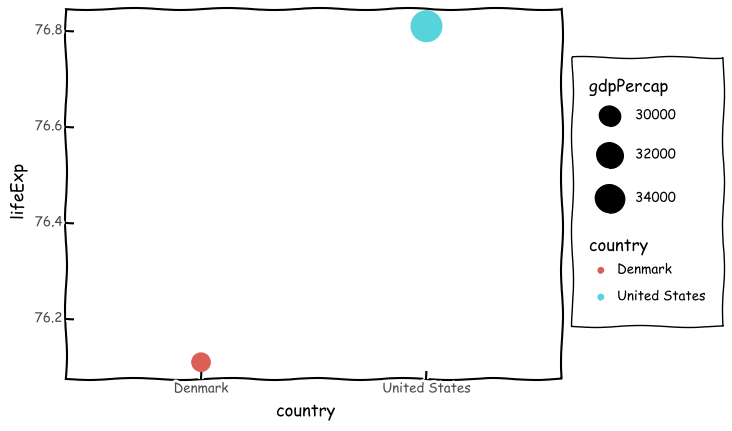

<ggplot: (138141712460)>

In [10]:
theme_set(theme_xkcd())

(ggplot(gapminder.query('year == "1997" and country == "Denmark" or year == "1997" and country == "United States"'),
        aes(
            x = 'country',
            y = 'lifeExp',
            size = 'gdpPercap',
            color = 'country'
        )
    ) +
    geom_point() +
    scale_size(
        range = [7, 12]
    )
)